In [1]:
import tensorflow as tf, numpy as np, matplotlib.pyplot as plt
plt.style.use('ggplot')

D:\Python\Anaconda3\envs\py3_5\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [ ]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

get_available_gpus()

In [ ]:
print(1)

## Difference Between Tensor and Python Variable

In [2]:
var = 1.
print("python variable: ", var)
print()

var_tensor = tf.constant(1.)
print("tensor: ", var_tensor)

python variable:  1.0

tensor:  Tensor("Const:0", shape=(), dtype=float32)


In [ ]:
with tf.Session() as sess:
    print("透過tensorflow session取得tensor value: ", sess.run(var_tensor))

<br/>
<br/>
<br/>
## Simple Regression Example
- Formula: $ Y = 0.5X + 0.3 $

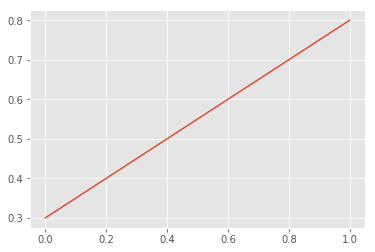

In [3]:
formula = lambda x: 0.5 * x + 0.3
data_x = np.linspace(0, 1, 100)
plt.plot(data_x, formula(data_x))
plt.show()

In [4]:
import tensorflow as tf, numpy as np

n_epoch = 200
learning_rate = 0.5

outerX = np.random.random(10000)
outerY = 0.5 * outerX + 0.3
outerX, outerY

model_dir = "./model/linear"

tf.reset_default_graph()
g = tf.Graph()
with g.as_default():
    with tf.variable_scope("inputs"):
        # 接收 outerX data
        placeholderX = tf.placeholder(tf.float32, shape=[None], name="placeholder_x")
        # 接收 outerY data
        placeholderY = tf.placeholder(tf.float32, shape=[None], name="placeholder_y")
        
    with tf.variable_scope("formula"):
        varW = tf.Variable(tf.random_uniform(shape=[1]), tf.float32, name="var_w")
        varB = tf.Variable(tf.random_uniform(shape=[1]), tf.float32, name="var_b")
        # 公式 0.5X + 0.3, 期望varW會慢慢逼近0.5, varB會慢慢逼近0.3
        varY = varW * placeholderX + varB
        # tensorboard weights logs
        tf.summary.histogram("varW", varW)
        tf.summary.histogram("varB", varB)
    # mean square error
    loss = tf.losses.mean_squared_error(placeholderY, varY)
    # tensorboard weights logs
    tf.summary.scalar("loss", loss)
    # 使用 GradientDescentOptimizer
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    # 最小化 loss, 此時會 backpropagation 去調整 varW, varB的值
    trainer = optimizer.minimize(loss)
    merge = tf.summary.merge_all()
    
    with tf.Session(graph=g) as sess:
        w = tf.summary.FileWriter("./model/linear", sess.graph)
        init = tf.global_variables_initializer()
        sess.run(init)
        for i in range(n_epoch):
            _, w_, b_ = sess.run([trainer, varW, varB], feed_dict={placeholderX: outerX, placeholderY: outerY})
            print('step: {} varW: {}, varB: {}'.format(i, w_, b_) )
            if (i + 1) % 20 == 0:
                merge_ = sess.run(merge, feed_dict={placeholderX: outerX, placeholderY: outerY})
                w.add_summary(merge_, i)

step: 0 varW: [0.70574504], varB: [0.18469426]
step: 1 varW: [0.69452256], varB: [0.1967762]
step: 2 varW: [0.6810061], varB: [0.2024066]
step: 3 varW: [0.6692025], varB: [0.20918792]
step: 4 varW: [0.65795934], varB: [0.21510985]
step: 5 varW: [0.64751965], varB: [0.22075063]
step: 6 varW: [0.6377547], varB: [0.2259883]
step: 7 varW: [0.62864023], varB: [0.23088746]
step: 8 varW: [0.62012774], varB: [0.23546025]
step: 9 varW: [0.6121788], varB: [0.23973103]
step: 10 varW: [0.6047558], varB: [0.24371907]
step: 11 varW: [0.597824], varB: [0.24744323]
step: 12 varW: [0.59135085], varB: [0.25092098]
step: 13 varW: [0.58530605], varB: [0.2541686]
step: 14 varW: [0.57966125], varB: [0.2572013]
step: 15 varW: [0.57439], varB: [0.26003337]
step: 16 varW: [0.56946754], varB: [0.262678]
step: 17 varW: [0.5648708], varB: [0.26514763]
step: 18 varW: [0.5605782], varB: [0.26745385]
step: 19 varW: [0.5565697], varB: [0.26960745]
step: 20 varW: [0.5528264], varB: [0.27161857]
step: 21 varW: [0.54933